<a href="https://colab.research.google.com/github/tkn13/datasci_project/blob/dev%2FFeature_Selection/Feature_Seleation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/tkn13/datasci_project
%cd datasci_project

Cloning into 'datasci_project'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (34/34), done.
Receiving objects: 100% (36/36), 68.38 KiB | 2.44 MiB/s, done.
remote: Total 36 (delta 12), reused 5 (delta 1), pack-reused 0 (from 0)
Resolving deltas: 100% (12/12), done.
/content/datasci_project


In [3]:
import sys
sys.path.append('/content/datasci_project')

In [4]:
import utils
utils.get_connection()

Mounted at /content/drive


'/content/drive/My Drive/datamine_shared/'

In [5]:
df = utils.load_data()

Loading data_clean_v1.csv...


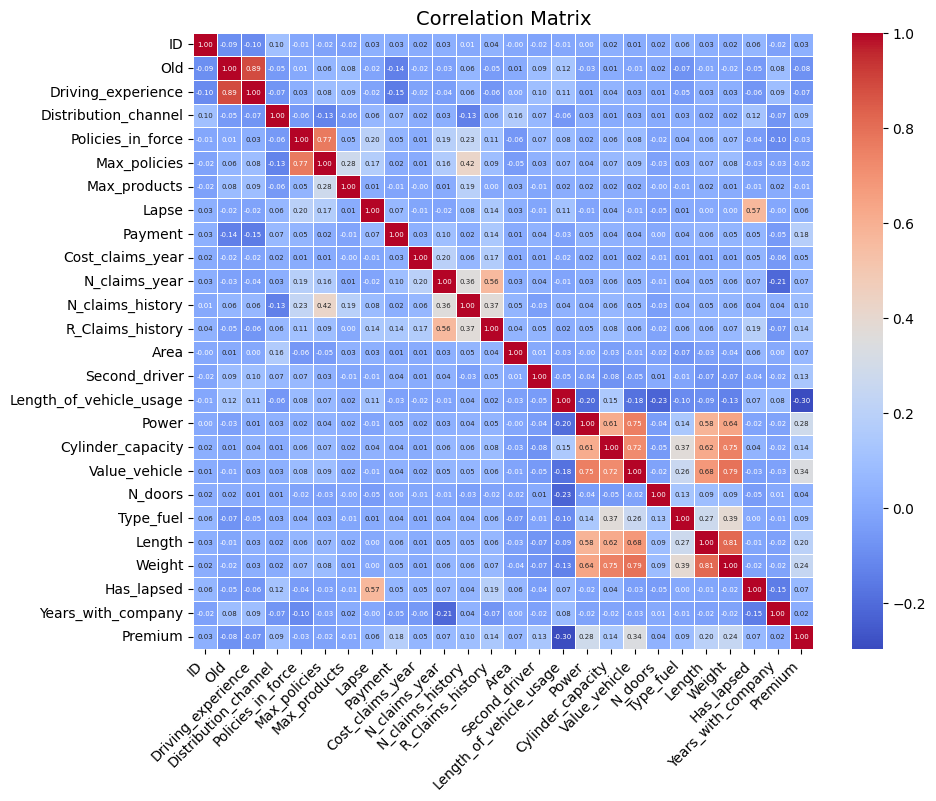

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size": 5}
)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.title('Correlation Matrix', fontsize=14)
plt.show()

Driving Experience VS Old /
Weight VS Cylinder_capacity /
Weight VS Value_vehicle /
Weight VS Length

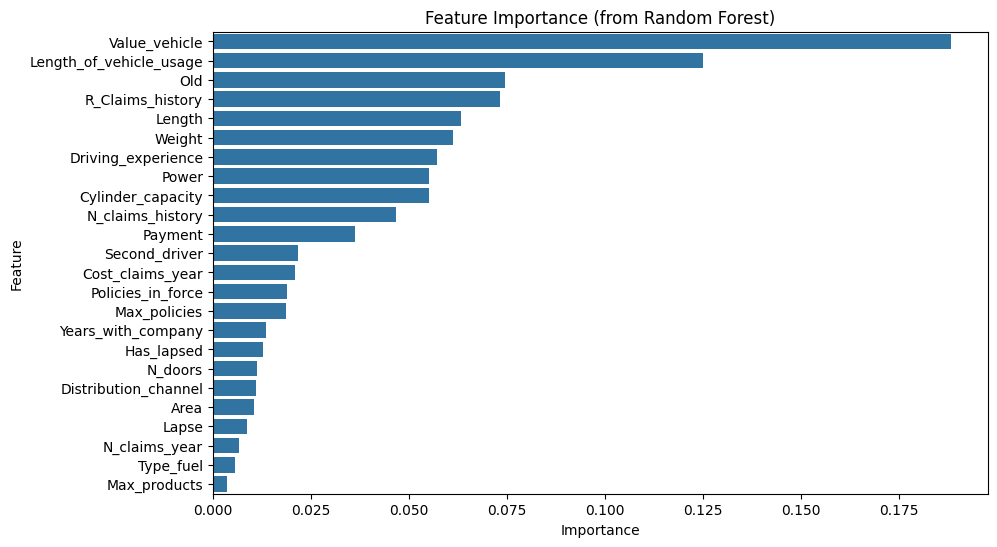

                    Feature  Importance
17            Value_vehicle    0.188300
14  Length_of_vehicle_usage    0.125073
0                       Old    0.074631
11         R_Claims_history    0.073352
20                   Length    0.063385
21                   Weight    0.061198
1        Driving_experience    0.057235
15                    Power    0.055144
16        Cylinder_capacity    0.055090
10         N_claims_history    0.046692


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
X = df.drop(['ID', 'Premium'], axis=1)
y = df['Premium']

model_fs = RandomForestRegressor(n_estimators=100, random_state=42)
model_fs.fit(X, y)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_fs.feature_importances_}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

print(feature_importance.head(10))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("--- Linear Regression Result ---")
print(f"R2 Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"Error (MAE): {mean_absolute_error(y_test, y_pred_lr):.2f}")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n--- Random Forest Result ---")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Error (MAE): {mean_absolute_error(y_test, y_pred_rf):.2f}")

--- Linear Regression Result ---
R2 Score: 0.2764
Error (MAE): 79.46

--- Random Forest Result ---
R2 Score: 0.5758
Error (MAE): 56.34
